In [81]:
import sys

%pwd

'C:\\Users\\Zver\\DS\\coursera\\Математика и python для анализа данных'

# Задача 1: сравнение предложений
Дан набор предложений, скопированных с Википедии. Каждое из них имеет "кошачью тему" в одном из трех смыслов:

кошки (животные)
UNIX-утилита cat для вывода содержимого файлов
версии операционной системы OS X, названные в честь семейства кошачьих
Ваша задача — найти два предложения, которые ближе всего по смыслу к расположенному в самой первой строке. В качестве меры близости по смыслу мы будем использовать косинусное расстояние.

Выполните следующие шаги:

1. Скачайте файл с предложениями (sentences.txt).

2. Каждая строка в файле соответствует одному предложению. Считайте их, приведите каждую к нижнему регистру с помощью строковой функции lower().

3. Произведите токенизацию, то есть разбиение текстов на слова. Для этого можно воспользоваться регулярным выражением, которое считает разделителем любой символ, не являющийся буквой: re.split('[^a-z]', t). Не забудьте удалить пустые слова после разделения.

4. Составьте список всех слов, встречающихся в предложениях. Сопоставьте каждому слову индекс от нуля до (d - 1), где d — число различных слов в предложениях. Для этого удобно воспользоваться структурой dict.

5. Создайте матрицу размера n * d, где n — число предложений. Заполните ее: элемент с индексом (i, j) в этой матрице должен быть равен количеству вхождений j-го слова в i-е предложение. У вас должна получиться матрица размера 22 * 254.

6. Найдите косинусное расстояние от предложения в самой первой строке (In comparison to dogs, cats have not undergone...) до всех остальных с помощью функции scipy.spatial.distance.cosine. Какие номера у двух предложений, ближайших к нему по этому расстоянию (строки нумеруются с нуля)? Эти два числа и будут ответами на задание. Само предложение (In comparison to dogs, cats have not undergone... ) имеет индекс 0.

7. Запишите полученные числа в файл, разделив пробелом. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. Пример файла с решением вы можете найти в конце задания (submission-1.txt).

8. Совпадают ли ближайшие два предложения по тематике с первым? Совпадают ли тематики у следующих по близости предложений?

Разумеется, использованный вами метод крайне простой. Например, он не учитывает формы слов (так, cat и cats он считает разными словами, хотя по сути они означают одно и то же), не удаляет из текстов артикли и прочие ненужные слова. Позже мы будем подробно изучать анализ текстов, где выясним, как достичь высокого качества в задаче поиска похожих предложений.

In [66]:
import re
import numpy as np
from scipy.spatial.distance import cosine

file_obj = open('sentences.txt', 'r')

#Преобразование строки в нижний регистр, а затем в список
def getCleanWords(line):
    line = line.lower()
    q = re.split('[^a-z]', line)
    clean = []
    for word in q:
        if word:
            clean.append(word)
    return clean

#Добавление слов в словарь
def addToSet(words, dset, i):
    for word in words:
        if word in dset:
            j = i
        else:
            dset[word] = i
            i = i + 1
    return (dset, i)

In [67]:
i = 0
count = 0
dset = {}
for line in file_obj:
    clean = getCleanWords(line)
    (dset, i) = addToSet(clean, dset, i)
        
    count = count + 1
#мб неправильно подсчитано кол-во
#print count, i
#print dset

file_obj.close()

In [68]:
file_obj = open('sentences.txt', 'r')
q = 0
j = 0
matrix = np.zeros((count, i))

for line in file_obj:
    clean = getCleanWords(line)
    print(j, clean)
    q = q + 1
    for word in clean:
        matrix[j, dset[word]] = matrix[j, dset[word]] + 1
    j = j + 1    
    
file_obj.close()

0 ['in', 'comparison', 'to', 'dogs', 'cats', 'have', 'not', 'undergone', 'major', 'changes', 'during', 'the', 'domestication', 'process']
1 ['as', 'cat', 'simply', 'catenates', 'streams', 'of', 'bytes', 'it', 'can', 'be', 'also', 'used', 'to', 'concatenate', 'binary', 'files', 'where', 'it', 'will', 'just', 'concatenate', 'sequence', 'of', 'bytes']
2 ['a', 'common', 'interactive', 'use', 'of', 'cat', 'for', 'a', 'single', 'file', 'is', 'to', 'output', 'the', 'content', 'of', 'a', 'file', 'to', 'standard', 'output']
3 ['cats', 'can', 'hear', 'sounds', 'too', 'faint', 'or', 'too', 'high', 'in', 'frequency', 'for', 'human', 'ears', 'such', 'as', 'those', 'made', 'by', 'mice', 'and', 'other', 'small', 'animals']
4 ['in', 'one', 'people', 'deliberately', 'tamed', 'cats', 'in', 'a', 'process', 'of', 'artificial', 'selection', 'as', 'they', 'were', 'useful', 'predators', 'of', 'vermin']
5 ['the', 'domesticated', 'cat', 'and', 'its', 'closest', 'wild', 'ancestor', 'are', 'both', 'diploid', 'or

In [70]:
for i in range(1, 22):
    print (cosine(matrix[0, :], matrix[i, :]), i)
#print matrix[0, :]
#print matrix[1, :]

0.9527544408738466 1
0.8644738145642124 2
0.8951715163278082 3
0.7770887149698589 4
0.9402385695332803 5
0.7327387580875756 6
0.9258750683338899 7
0.8842724875284311 8
0.9055088817476932 9
0.8328165362273942 10
0.8804771390665607 11
0.8396432548525454 12
0.8703592552895671 13
0.8740118423302576 14
0.9442721787424647 15
0.8406361854220809 16
0.956644501523794 17
0.9442721787424647 18
0.8885443574849294 19
0.8427572744917122 20
0.8250364469440588 21


# Задача 2: аппроксимация функции

---

Рассмотрим сложную математическую функцию на отрезке [1, 15]:

f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)

Она может описывать, например, зависимость оценок, которые выставляют определенному сорту вина эксперты, в зависимости от возраста этого вина. По сути, задача машинного обучения состоит в том, чтобы приблизить сложную зависимость с помощью функции из определенного семейства. В этом задании мы будем приближать указанную функцию с помощью многочленов.

Как известно, многочлен степени n (то есть w_0 + w_1 x + w_2 x^2 + ... + w_n x^n) однозначно определяется любыми n + 1 различными точками, через которые он проходит.

Воспользуемся описанным свойством, и будем находить приближение функции многочленом, решая систему линейных уравнений.

1. Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?
2. Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?
3. Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию? Коэффициенты данного многочлена (четыре числа в следующем порядке: w_0, w_1, w_2, w_3) являются ответом на задачу. Округлять коэффициенты не обязательно, но при желании можете произвести округление до второго знака (т.е. до числа вида 0.42)
4. Запишите полученные числа в файл, разделив пробелами. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. Пример файла с решением вы можете найти в конце задания (submission-2.txt).

In [31]:
%matplotlib inline
import math
from matplotlib import pyplot as plt

def f(x):
    return (math.sin(x/5.)*math.exp(x/10.) + 5*math.exp(-x/2.) )

In [47]:
x = np.arange(1, 16, 0.1)
              
y = []
i = 0
for i in range(len(x)):
    y.append( f(x[i]) )

In [48]:
print(x, '\n') #

print(y)

[ 1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3
  2.4  2.5  2.6  2.7  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7
  3.8  3.9  4.   4.1  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1
  5.2  5.3  5.4  5.5  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5
  6.6  6.7  6.8  6.9  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9
  8.   8.1  8.2  8.3  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3
  9.4  9.5  9.6  9.7  9.8  9.9 10.  10.1 10.2 10.3 10.4 10.5 10.6 10.7
 10.8 10.9 11.  11.1 11.2 11.3 11.4 11.5 11.6 11.7 11.8 11.9 12.  12.1
 12.2 12.3 12.4 12.5 12.6 12.7 12.8 12.9 13.  13.1 13.2 13.3 13.4 13.5
 13.6 13.7 13.8 13.9 14.  14.1 14.2 14.3 14.4 14.5 14.6 14.7 14.8 14.9
 15.  15.1 15.2 15.3 15.4 15.5 15.6 15.7 15.8 15.9] 

1.1
[3.252216865271419, 3.128353994472113, 3.012067143378875, 2.902999513100624, 2.800811180666543, 2.7051782592223566, 2.615792099119626, 2.532358527910862, 2.4545971273603557, 2.382240545672994, 2.315033843231158, 2.2527338702133894, 

NameError: name 'y_approx_2' is not defined

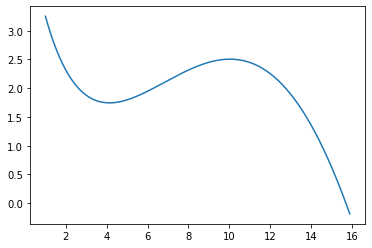

In [49]:
plt.plot(x, y)
plt.plot(x, y_approx_2)
plt.plot(x, y_approx_3)
plt.plot(x, y_approx_4)

In [50]:
def get_matrix(x_points):
    n = len(x_points)
    matrix = []
    for x in x_points:
        row = []
        for i in range(n):
            row.append(x**i)
        matrix.append(row)
    return np.array(matrix)

def get_approximate_values(w, x_points):
    y = []
    for x in x_points:
        y_curr = 0
        for i in range(len(w)):
            y_curr += w[i]*(x ** i)
        y.append(y_curr)
    return y

In [52]:
import scipy

x_2 = [1, 15]
A_2 = get_matrix(x_2)
y_2 = np.array(map(f, x_2))
w_2 = scipy.linalg.solve(A_2, y_2)
y_approx_2 = get_approximate_values(w_2, x)

ValueError: object arrays are not supported

In [ ]:
x_3 = [1, 8, 15]
A_3 = get_matrix(x_3)
y_3 = np.array(map(f, x_3))
w_3 = scipy.linalg.solve(A_3, y_3)
y_approx_3 = get_approximate_values(w_3, x)

In [ ]:
x_4 = [1, 4, 10, 15]
A_4 = get_matrix(x_4)
y_4 = np.array(map(f, x_4))
w_4 = scipy.linalg.solve(A_4, y_4)
y_approx_4 = get_approximate_values(w_4, x)

In [ ]:
print(w_4)